In [1]:
import os
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import random
import copy

# Preprocess

In [2]:
directory = './csvFiles'

In [3]:
csv_files = [file for file in os.listdir(directory) if file.endswith('.csv')]

In [4]:
# 파일 목록을 랜덤하게 섞습니다.
random.seed(42)  # 재현 가능한 결과를 위해 시드 설정
random.shuffle(csv_files)

In [5]:
# 첫 번째 파일에서 컬럼 이름을 가져옵니다.
first_file_path = os.path.join(directory, csv_files[0])
first_df = pd.read_csv(first_file_path)

In [6]:
separator_token = 999
separator = pd.DataFrame({col: separator_token for col in first_df.columns}, index=[0])

In [7]:
df_list = []
for file in csv_files:
    file_path = os.path.join(directory, file)
    df = pd.read_csv(file_path)
    df = df.iloc[300:-100]
    df_list.append(df)
    df_list.append(separator) 

In [8]:
combined_df = pd.concat(df_list, ignore_index=True)

In [9]:
combined_df

,Frame,Time,m_avg_PelvisPosX,m_avg_PelvisPosY,m_avg_PelvisPosZ,m_avg_PelvisRotX,m_avg_PelvisRotY,m_avg_PelvisRotZ,m_avg_L_HipPosX,m_avg_L_HipPosY,...,m_avg_R_ElbowRotX,m_avg_R_ElbowRotY,m_avg_R_ElbowRotZ,m_avg_R_WristPosX,m_avg_R_WristPosY,m_avg_R_WristPosZ,m_avg_R_WristRotX,m_avg_R_WristRotY,m_avg_R_WristRotZ,Unnamed: 128
0,301,3.454812,0.021056,0.537794,0.689871,358.82500,0.679502,359.8412,-0.037938,0.455332,...,8.262754,352.2222,350.739100,0.733168,0.943708,0.631755,0.200809,359.55840,0.846429,NaN
1,302,3.465498,0.021056,0.537794,0.689871,358.82500,0.679502,359.8412,-0.037938,0.455332,...,8.274371,352.2729,350.772300,0.733238,0.943977,0.631620,0.114945,359.53570,0.884086,NaN
2,303,3.476308,0.021056,0.537794,0.689871,358.82500,0.679502,359.8412,-0.037938,0.455332,...,8.273871,352.2918,350.806000,0.733297,0.944234,0.631682,0.151095,359.52710,0.923961,NaN
3,304,3.487449,0.021056,0.537794,0.689871,358.82500,0.679492,359.8412,-0.037938,0.455332,...,8.267890,352.2754,350.814000,0.733297,0.944235,0.631826,0.239347,359.53850,0.959352,NaN
4,305,3.498579,0.021056,0.537794,0.689871,358.82500,0.679492,359.8412,-0.037938,0.455332,...,8.257694,352.2285,350.846900,0.733279,0.944438,0.631913,0.385812,359.57180,0.958712,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1250495,4600,51.260610,-0.674628,0.459754,0.821685,18.35563,179.608500,357.6249,-0.614788,0.391658,...,11.131550,198.3722,3.791916,-1.323386,1.040075,0.924556,47.211770,37.32508,178.617100,NaN
1250496,4601,51.271360,-0.674628,0.459754,0.821685,18.35563,179.608500,357.6249,-0.614788,0.391658,...,11.133720,198.4202,3.836214,-1.323311,1.040272,0.924719,47.288450,37.23001,178.460700,NaN
1250497,4602,51.283000,-0.674628,0.459754,0.821685,18.35563,179.608500,357.6249,-0.614788,0.391658,...,11.135700,198.4699,3.866319,-1.323236,1.040406,0.924903,47.363370,37.13769,178.286900,NaN
1250498,4603,51.293670,-0.674747,0.459201,0.823021,18.44855,179.665600,357.4926,-0.614688,0.391303,...,11.140010,198.5145,3.896140,-1.322936,1.038698,0.926400,47.438840,37.06465,178.126200,NaN


In [10]:
len(combined_df)

1250500

In [11]:
# Rotation 컬럼만 선택
rotation_columns = [col for col in combined_df.columns if 'Rot' in col]

# Position 컬럼만 선택
position_columns = [col for col in combined_df.columns if 'Pos' in col]

# DataFrame 분리
rotation_df = combined_df[rotation_columns]
position_df = combined_df[position_columns]

# Rotation 컬럼만 -180~180 사이로 정규화
normalize_angle = lambda x:x if x == 999 else (x - 360) if x > 180 else (x + 360) if x < -180 else x
rotation_df = rotation_df.apply(lambda col: col.apply(normalize_angle))

In [12]:
# -180 ~ 180 범위를 벗어나는 값이 있는지 확인
num_values_out_of_range = rotation_df.apply(lambda col: col.apply(lambda x: x != 999 and (x > 180 or x < -180))).sum().sum()

# 결과 확인
if num_values_out_of_range > 0:
    print(f"범위를 벗어나는 값의 수: {num_values_out_of_range}")
else:
    print("범위를 벗어나는 값이 없습니다.")

범위를 벗어나는 값이 없습니다.


In [13]:
# Position 컬럼은 그대로 두고, 다시 합치기
posrot_df = pd.concat([position_df, rotation_df], axis=1)

In [14]:
posrot_df.to_csv('./posrot_df.csv', index=False)

# Transformer Learning

In [15]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torchsummary import summary
from sklearn.model_selection import train_test_split
import math
from tqdm import tqdm

In [16]:
# 변환된 데이터를 DataFrame으로 변환
posrot_df = pd.DataFrame(posrot_df, columns=posrot_df.columns)

In [17]:
posrot_df = posrot_df.map(lambda x: float(f"{x:.2f}") if isinstance(x, (int, float)) else x)

In [18]:
posrot_df

,m_avg_PelvisPosX,m_avg_PelvisPosY,m_avg_PelvisPosZ,m_avg_L_HipPosX,m_avg_L_HipPosY,m_avg_L_HipPosZ,m_avg_L_KneePosX,m_avg_L_KneePosY,m_avg_L_KneePosZ,m_avg_L_AnklePosX,...,m_avg_R_CollarRotZ,m_avg_R_ShoulderRotX,m_avg_R_ShoulderRotY,m_avg_R_ShoulderRotZ,m_avg_R_ElbowRotX,m_avg_R_ElbowRotY,m_avg_R_ElbowRotZ,m_avg_R_WristRotX,m_avg_R_WristRotY,m_avg_R_WristRotZ
0,0.02,0.54,0.69,-0.04,0.46,0.67,-0.08,0.07,0.68,-0.07,...,1.80,9.14,-0.34,-6.66,8.26,-7.78,-9.26,0.20,-0.44,0.85
1,0.02,0.54,0.69,-0.04,0.46,0.67,-0.08,0.07,0.68,-0.07,...,1.80,9.14,-0.35,-6.63,8.27,-7.73,-9.23,0.11,-0.46,0.88
2,0.02,0.54,0.69,-0.04,0.46,0.67,-0.08,0.07,0.68,-0.07,...,1.80,9.13,-0.37,-6.61,8.27,-7.71,-9.19,0.15,-0.47,0.92
3,0.02,0.54,0.69,-0.04,0.46,0.67,-0.08,0.07,0.68,-0.07,...,1.80,9.12,-0.39,-6.62,8.27,-7.72,-9.19,0.24,-0.46,0.96
4,0.02,0.54,0.69,-0.04,0.46,0.67,-0.08,0.07,0.68,-0.07,...,1.80,9.12,-0.35,-6.60,8.26,-7.77,-9.15,0.39,-0.43,0.96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1250495,-0.67,0.46,0.82,-0.61,0.39,0.86,-0.47,0.04,0.86,-0.49,...,21.79,11.64,-178.00,15.93,11.13,-161.63,3.79,47.21,37.33,178.62
1250496,-0.67,0.46,0.82,-0.61,0.39,0.86,-0.47,0.04,0.86,-0.49,...,21.79,11.64,-178.00,15.93,11.13,-161.58,3.84,47.29,37.23,178.46
1250497,-0.67,0.46,0.82,-0.61,0.39,0.86,-0.47,0.04,0.86,-0.49,...,21.79,11.64,-178.00,15.93,11.14,-161.53,3.87,47.36,37.14,178.29
1250498,-0.67,0.46,0.82,-0.61,0.39,0.86,-0.47,0.04,0.85,-0.49,...,22.25,12.38,-177.68,15.54,11.14,-161.49,3.90,47.44,37.06,178.13


In [19]:
train = posrot_df.iloc[:1000400]
test = posrot_df.iloc[1000400:]

In [20]:
X_train, X_val = train_test_split(train, test_size=0.2, random_state=42, shuffle=False)

In [21]:
batch_size = 128
n_input = 30  # Sequence length
n_features = 126  # Number of features
output_units = (21 * 3)  # Output shape
head_size = 256  # Size of attention head
num_heads = 7  # Number of attention heads
ff_dim = 512  # Hidden layer size in feed forward network inside transformer
num_blocks = 4  # Number of transformer blocks
mlp_units = [512, 256, 128]  # Size of the dense layers of the final classifier
dropout_rate = 0.3 


In [22]:
class TimeseriesDataset(Dataset):
    def __init__(self, data, sequence_length):
        self.data = data
        self.sequence_length = sequence_length

    def __len__(self):
        return len(self.data) - self.sequence_length + 1

    def __getitem__(self, index):
        x = self.data[index:index+self.sequence_length] # : 입력 시퀀스 (30개의 데이터)
        y = self.data[index+self.sequence_length-1] # : 예측 시퀀스 (1개의 데이터)
        return torch.from_numpy(x).float(), torch.from_numpy(y).float()

# 데이터셋과 데이터 로더를 생성
train_dataset = TimeseriesDataset(X_train.values, n_input)
val_dataset = TimeseriesDataset(X_val.values, n_input)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=False)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

In [23]:
# 데이터 로더에서 첫 번째 배치를 가져와서 형태를 확인
first_batch = next(iter(train_loader))
X, y = first_batch

print("X batch shape:", X.shape)
print("y batch shape:", y.shape)

X batch shape: torch.Size([128, 30, 126])
y batch shape: torch.Size([128, 126])


### Transformer Model

In [24]:
# Positional Encoding 정의
class PositionalEncoding(nn.Module):
    def __init__(self, n_features, n_input):
        super(PositionalEncoding, self).__init__() # 상속받은 nn.Module 클래스의 __init__() 메서드 호출
        pe = torch.zeros(n_input, n_features) # 가장 큰 시퀀스 길이인 max_len을 기준으로 모두 0으로 채워진 크기가 (max_len, n_features)인 텐서 생성
        position = torch.arange(0, n_input, dtype=torch.float).unsqueeze(1) # position 텐서 생성

        # div_term을 계산하는 방식 수정
        div_term = torch.exp(torch.arange(0, n_features, 2).float() * (-math.log(10000.0) / n_features)) # div_term 계산
        
        # div_term의 길이를 n_features의 절반으로 조정
        div_term = div_term.repeat_interleave(2)[:n_features] # div_term 텐서 생성

        pe[:, 0::2] = torch.sin(position * div_term[0::2]) # 짝수 인덱스에는 sin 함수 적용
        pe[:, 1::2] = torch.cos(position * div_term[1::2]) # 홀수 인덱스에는 cos 함수 적용
        pe = pe.unsqueeze(0) # pe = [bs, seq_len, n_feautres]
        self.register_buffer('pe', pe) # pe 텐서를 모델의 버퍼로 등록

    def forward(self, x):
        # print(self.pe.shape)
        x = x + self.pe[:, :x.size(1), :] # 입력에 위치 인코딩을 더함
        return x

# Transformer Block 정의
class TransformerBlock(nn.Module):
    def __init__(self, n_features, num_heads, ff_dim, dropout):
        super(TransformerBlock, self).__init__()
        self.attention = nn.MultiheadAttention(n_features, num_heads, dropout=dropout)
        self.ffn = nn.Sequential(
            nn.Linear(n_features, ff_dim),
            nn.ReLU(),
            nn.Linear(ff_dim, n_features)
        )
        self.norm1 = nn.LayerNorm(n_features)
        self.norm2 = nn.LayerNorm(n_features)
        self.dropout = nn.Dropout(dropout)

    def forward(self, x):
        attention_output, _ = self.attention(x, x, x)
        x = self.norm1(x + self.dropout(attention_output))
        ffn_output = self.ffn(x)
        x = self.norm2(x + self.dropout(ffn_output))
        return x
    
# 모델 정의
class TransformerModel(nn.Module):
    def __init__(self, n_features, num_heads, ff_dim, num_blocks, mlp_units, dropout, n_input):
        super(TransformerModel, self).__init__()
        self.pos_encoder = PositionalEncoding(n_features, n_input)
        self.transformer_blocks = nn.ModuleList([TransformerBlock(n_features, num_heads, ff_dim, dropout) for _ in range(num_blocks)])
        
        self.layers = nn.Sequential()
        # 첫 번째 nn.Linear 층의 입력 차원을 n_features로 설정
        self.layers.add_module("dense_0", nn.Linear(n_features, mlp_units[0]))
        self.layers.add_module("relu_0", nn.ReLU())
        self.layers.add_module("dropout_0", nn.Dropout(dropout))
        self.layers.add_module("norm_0", nn.LayerNorm(mlp_units[0]))

        # 이후 층들에 대한 설정
        for i in range(1, len(mlp_units)):
            self.layers.add_module(f"dense_{i}", nn.Linear(mlp_units[i-1], mlp_units[i]))
            self.layers.add_module(f"relu_{i}", nn.ReLU())
            self.layers.add_module(f"dropout_{i}", nn.Dropout(dropout))
            self.layers.add_module(f"norm_{i}", nn.LayerNorm(mlp_units[i]))

        # 최종 출력 층
        self.out = nn.Linear(mlp_units[-1], n_features)

    def forward(self, x):
        x = self.pos_encoder(x)
        for block in self.transformer_blocks:
            x = block(x)
        x = torch.mean(x, dim=1)
        x = self.layers(x)
        return self.out(x)

model = TransformerModel(n_features, num_heads, ff_dim, num_blocks, mlp_units, dropout_rate, n_input)


In [25]:
pos_encoder = PositionalEncoding(n_features, n_input)
x = torch.rand(128, 30, 126)
y = pos_encoder(x)

In [26]:
column_order = [
    'm_avg_PelvisPosX', 'm_avg_PelvisPosY', 'm_avg_PelvisPosZ',
    'm_avg_L_HipPosX', 'm_avg_L_HipPosY', 'm_avg_L_HipPosZ',
    'm_avg_L_KneePosX', 'm_avg_L_KneePosY', 'm_avg_L_KneePosZ',
    'm_avg_L_AnklePosX', 'm_avg_L_AnklePosY', 'm_avg_L_AnklePosZ',
    'm_avg_L_FootPosX', 'm_avg_L_FootPosY', 'm_avg_L_FootPosZ',
    'm_avg_R_HipPosX', 'm_avg_R_HipPosY', 'm_avg_R_HipPosZ',
    'm_avg_R_KneePosX', 'm_avg_R_KneePosY', 'm_avg_R_KneePosZ',
    'm_avg_R_AnklePosX', 'm_avg_R_AnklePosY', 'm_avg_R_AnklePosZ',
    'm_avg_R_FootPosX', 'm_avg_R_FootPosY', 'm_avg_R_FootPosZ',
    'm_avg_Spine1PosX', 'm_avg_Spine1PosY', 'm_avg_Spine1PosZ',
    'm_avg_Spine2PosX', 'm_avg_Spine2PosY', 'm_avg_Spine2PosZ',
    'm_avg_L_CollarPosX', 'm_avg_L_CollarPosY', 'm_avg_L_CollarPosZ',
    'm_avg_L_ShoulderPosX', 'm_avg_L_ShoulderPosY', 'm_avg_L_ShoulderPosZ',
    'm_avg_L_ElbowPosX', 'm_avg_L_ElbowPosY', 'm_avg_L_ElbowPosZ',
    'm_avg_L_WristPosX', 'm_avg_L_WristPosY', 'm_avg_L_WristPosZ',
    'm_avg_NeckPosX', 'm_avg_NeckPosY', 'm_avg_NeckPosZ',
    'm_avg_HeadPosX', 'm_avg_HeadPosY', 'm_avg_HeadPosZ',
    'm_avg_R_CollarPosX', 'm_avg_R_CollarPosY', 'm_avg_R_CollarPosZ',
    'm_avg_R_ShoulderPosX', 'm_avg_R_ShoulderPosY', 'm_avg_R_ShoulderPosZ',
    'm_avg_R_ElbowPosX', 'm_avg_R_ElbowPosY', 'm_avg_R_ElbowPosZ',
    'm_avg_R_WristPosX', 'm_avg_R_WristPosY', 'm_avg_R_WristPosZ',
    'm_avg_PelvisRotX', 'm_avg_PelvisRotY', 'm_avg_PelvisRotZ',
    'm_avg_L_HipRotX', 'm_avg_L_HipRotY', 'm_avg_L_HipRotZ',
    'm_avg_L_KneeRotX', 'm_avg_L_KneeRotY', 'm_avg_L_KneeRotZ',
    'm_avg_L_AnkleRotX', 'm_avg_L_AnkleRotY', 'm_avg_L_AnkleRotZ',
    'm_avg_L_FootRotX', 'm_avg_L_FootRotY', 'm_avg_L_FootRotZ',
    'm_avg_R_HipRotX', 'm_avg_R_HipRotY', 'm_avg_R_HipRotZ',
    'm_avg_R_KneeRotX', 'm_avg_R_KneeRotY', 'm_avg_R_KneeRotZ',
    'm_avg_R_AnkleRotX', 'm_avg_R_AnkleRotY', 'm_avg_R_AnkleRotZ',
    'm_avg_R_FootRotX', 'm_avg_R_FootRotY', 'm_avg_R_FootRotZ',
    'm_avg_Spine1RotX', 'm_avg_Spine1RotY', 'm_avg_Spine1RotZ',
    'm_avg_Spine2RotX', 'm_avg_Spine2RotY', 'm_avg_Spine2RotZ',
    'm_avg_L_CollarRotX', 'm_avg_L_CollarRotY', 'm_avg_L_CollarRotZ',
    'm_avg_L_ShoulderRotX', 'm_avg_L_ShoulderRotY', 'm_avg_L_ShoulderRotZ',
    'm_avg_L_ElbowRotX', 'm_avg_L_ElbowRotY', 'm_avg_L_ElbowRotZ',
    'm_avg_L_WristRotX', 'm_avg_L_WristRotY', 'm_avg_L_WristRotZ',
    'm_avg_NeckRotX', 'm_avg_NeckRotY', 'm_avg_NeckRotZ',
    'm_avg_HeadRotX', 'm_avg_HeadRotY', 'm_avg_HeadRotZ',
    'm_avg_R_CollarRotX', 'm_avg_R_CollarRotY', 'm_avg_R_CollarRotZ',
    'm_avg_R_ShoulderRotX', 'm_avg_R_ShoulderRotY', 'm_avg_R_ShoulderRotZ',
    'm_avg_R_ElbowRotX', 'm_avg_R_ElbowRotY', 'm_avg_R_ElbowRotZ',
    'm_avg_R_WristRotX', 'm_avg_R_WristRotY', 'm_avg_R_WristRotZ'
    ]

   


In [27]:
column_names = [
    'm_avg_HeadPosX', 'm_avg_HeadPosY', 'm_avg_HeadPosZ',
    'm_avg_L_WristPosX', 'm_avg_L_WristPosY', 'm_avg_L_WristPosZ',
    'm_avg_R_WristPosX', 'm_avg_R_WristPosY', 'm_avg_R_WristPosZ',
    'm_avg_L_FootPosX', 'm_avg_L_FootPosY', 'm_avg_L_FootPosZ',
    'm_avg_R_FootPosX', 'm_avg_R_FootPosY', 'm_avg_R_FootPosZ',
    'm_avg_HeadRotX', 'm_avg_HeadRotY', 'm_avg_HeadRotZ',
    'm_avg_L_WristRotX', 'm_avg_L_WristRotY', 'm_avg_L_WristRotZ',
    'm_avg_R_WristRotX', 'm_avg_R_WristRotY', 'm_avg_R_WristRotZ',
    'm_avg_L_FootRotX', 'm_avg_L_FootRotY', 'm_avg_L_FootRotZ',
    'm_avg_R_FootRotX', 'm_avg_R_FootRotY', 'm_avg_R_FootRotZ',
]

weighted_columns_indices = [column_order.index(name) for name in column_names]
print(weighted_columns_indices)

[48, 49, 50, 42, 43, 44, 60, 61, 62, 12, 13, 14, 24, 25, 26, 111, 112, 113, 105, 106, 107, 123, 124, 125, 75, 76, 77, 87, 88, 89]


In [28]:
class CustomLoss(nn.Module):
    def __init__(self, weighted_columns_indices, weight_for_weighted_columns, threshold, penalty_weight):
        super(CustomLoss, self).__init__()
        self.weighted_columns_indices = torch.tensor(weighted_columns_indices)
        self.weight_for_weighted_columns = weight_for_weighted_columns
        self.threshold = threshold  # 신체 움직임의 임계값
        self.penalty_weight = penalty_weight  # 비정상적 움직임에 대한 패널티 가중치

    def forward(self, y_true, y_pred):
        # y_pred의 마지막 feature를 rot_diff_category로 분리
        y_pred_values = y_pred[:, :]

        # MSE 계산
        mse = F.mse_loss(y_true[:, :], y_pred_values, reduction='none')
        mse = mse.mean(axis=-1)

        # 특정 joint에 대한 가중치 적용
        weighted_mse = y_pred[:, self.weighted_columns_indices]
        weighted_mse = (weighted_mse ** 2) * self.weight_for_weighted_columns
        mse += weighted_mse.mean(axis=-1)

        # 과도한 움직임에 대한 패널티 적용
        excessive_movement_penalty = (y_pred - y_true).abs() > self.threshold
        penalty = excessive_movement_penalty.type(torch.float32) * self.penalty_weight
        mse += penalty.mean(axis=-1)

        return mse.mean()  # 전체 배치에 대한 평균 손실 반환

# 가중치를 적용할 열 인덱스와 가중치 값
weighted_columns_indices = weighted_columns_indices
weight_for_weighted_columns = 2.0

# 임계값과 패널티 가중치 설정
threshold = 10.0  # 예시 임계값
penalty_weight = 1.0  # 예시 패널티 가중치

# CustomLoss 인스턴스 생성
custom_loss_instance = CustomLoss(
    weighted_columns_indices=weighted_columns_indices,
    weight_for_weighted_columns=weight_for_weighted_columns,
    threshold=threshold,
    penalty_weight=penalty_weight
)

In [29]:
# 최적화기와 손실 함수
optimizer = optim.Adam(model.parameters(), lr=0.0001)
criterion = custom_loss_instance

In [30]:
# 설정
epochs = 100
patience = 7  # Early Stopping patience
best_loss = np.inf
early_stopping_counter = 0

In [31]:
# Learning Rate Scheduler 설정
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', factor=0.2, patience=7, min_lr=0.00001)

In [32]:
# 사용 가능한 GPU 목록을 출력
available_gpus = torch.cuda.device_count()
print("Available GPUs:", available_gpus)

# 현재 장치를 출력 (GPU 사용 가능시 CUDA 장치, 그렇지 않으면 CPU)
current_device = torch.cuda.current_device() if torch.cuda.is_available() else 'CPU'
print("Current device:", torch.cuda.get_device_name(current_device) if torch.cuda.is_available() else current_device)

Available GPUs: 1
Current device: NVIDIA GeForce RTX 4090


In [33]:
model = model.to(current_device)

In [34]:
summary(model, input_size=(n_input, n_features))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
PositionalEncoding-1              [-1, 30, 126]               0
MultiheadAttention-2  [[-1, 30, 126], [-1, 2, 2]]               0
           Dropout-3              [-1, 30, 126]               0
         LayerNorm-4              [-1, 30, 126]             252
            Linear-5              [-1, 30, 512]          65,024
              ReLU-6              [-1, 30, 512]               0
            Linear-7              [-1, 30, 126]          64,638
           Dropout-8              [-1, 30, 126]               0
         LayerNorm-9              [-1, 30, 126]             252
 TransformerBlock-10              [-1, 30, 126]               0
MultiheadAttention-11  [[-1, 30, 126], [-1, 2, 2]]               0
          Dropout-12              [-1, 30, 126]               0
        LayerNorm-13              [-1, 30, 126]             252
           Linear-14              

In [64]:
# 훈련 루프
train_losses = []
val_losses = []

for epoch in range(epochs):
    model.train()
    train_loss = 0.0
    # 훈련 데이터 로더에 대한 프로그레스 바 추가
    train_progress_bar = tqdm(train_loader, desc=f'Epoch {epoch+1}/{epochs}', unit='batch')

    for data, target in train_progress_bar:
        data, target = data.to(current_device), target.to(current_device)
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        train_loss += loss.item() * data.size(0)
        # 프로그레스 바 업데이트
        train_progress_bar.set_postfix({'train_loss': loss.item()})

    train_losses.append(train_loss / len(train_loader.dataset))

    model.eval()
    val_loss = 0.0
    # 검증 데이터 로더에 대한 프로그레스 바 추가
    val_progress_bar = tqdm(val_loader, desc=f'Validation Epoch {epoch+1}/{epochs}', unit='batch')

    with torch.no_grad():
        for data, target in val_progress_bar:
            data, target = data.to(current_device), target.to(current_device)
            output = model(data)
            loss = criterion(output, target)
            val_loss += loss.item() * data.size(0)
            # 프로그레스 바 업데이트
            val_progress_bar.set_postfix({'val_loss': loss.item()})

    val_losses.append(val_loss / len(val_loader.dataset))
    print(f'Epoch {epoch+1} \t Training Loss: {train_loss:.6f} \t Validation Loss: {val_loss:.6f}')
    
    # Learning Rate Scheduler 업데이트
    scheduler.step(val_loss)

    # Early Stopping
    if val_loss < best_loss:
        best_loss = val_loss
        best_model_wts = copy.deepcopy(model.state_dict())
        torch.save(model.state_dict(), 'best_model.pth')
        early_stopping_counter = 0
    else:
        early_stopping_counter += 1
        if early_stopping_counter >= patience:
            print("Early stopping")
            break

# 가장 좋은 모델 가중치 로드
model.load_state_dict(best_model_wts)

Validation Epoch 1/100: 100%|██████████| 1563/1563 [00:05<00:00, 261.04batch/s, val_loss=1.56e+3]


Epoch 1 	 Training Loss: 5433308393.257568 	 Validation Loss: 1595696599.440552


Validation Epoch 2/100: 100%|██████████| 1563/1563 [00:06<00:00, 257.93batch/s, val_loss=1.53e+3]


Epoch 2 	 Training Loss: 5126411010.807129 	 Validation Loss: 1535969693.170898


Validation Epoch 3/100: 100%|██████████| 1563/1563 [00:06<00:00, 252.20batch/s, val_loss=1.53e+3]


Epoch 3 	 Training Loss: 4978193536.576904 	 Validation Loss: 1512654703.211548


Validation Epoch 4/100: 100%|██████████| 1563/1563 [00:06<00:00, 257.20batch/s, val_loss=1.53e+3]


Epoch 4 	 Training Loss: 4894321297.650146 	 Validation Loss: 1503027026.713135


Validation Epoch 5/100: 100%|██████████| 1563/1563 [00:06<00:00, 255.37batch/s, val_loss=1.52e+3]


Epoch 5 	 Training Loss: 4839461441.876953 	 Validation Loss: 1485417551.337891


Validation Epoch 6/100: 100%|██████████| 1563/1563 [00:06<00:00, 251.64batch/s, val_loss=1.52e+3]


Epoch 6 	 Training Loss: 4798136170.328613 	 Validation Loss: 1472891314.621704


Validation Epoch 7/100: 100%|██████████| 1563/1563 [00:06<00:00, 227.54batch/s, val_loss=1.52e+3]


Epoch 7 	 Training Loss: 4764212110.210938 	 Validation Loss: 1462284860.656372


Validation Epoch 8/100: 100%|██████████| 1563/1563 [00:06<00:00, 233.07batch/s, val_loss=1.52e+3]


Epoch 8 	 Training Loss: 4735526704.660156 	 Validation Loss: 1456951830.192627


Validation Epoch 9/100: 100%|██████████| 1563/1563 [00:06<00:00, 239.84batch/s, val_loss=1.52e+3]


Epoch 9 	 Training Loss: 4709721001.416016 	 Validation Loss: 1448138153.205811


Validation Epoch 10/100: 100%|██████████| 1563/1563 [00:06<00:00, 251.29batch/s, val_loss=1.52e+3]


Epoch 10 	 Training Loss: 4686447945.499023 	 Validation Loss: 1437912321.899292


Validation Epoch 11/100: 100%|██████████| 1563/1563 [00:06<00:00, 235.58batch/s, val_loss=1.52e+3]


Epoch 11 	 Training Loss: 4662726160.644531 	 Validation Loss: 1435773708.073608


Validation Epoch 12/100: 100%|██████████| 1563/1563 [00:06<00:00, 257.37batch/s, val_loss=1.52e+3]


Epoch 12 	 Training Loss: 4640852463.078369 	 Validation Loss: 1418573406.522827


Validation Epoch 13/100: 100%|██████████| 1563/1563 [00:05<00:00, 264.95batch/s, val_loss=1.52e+3]


Epoch 13 	 Training Loss: 4619468577.898682 	 Validation Loss: 1413740915.587280


Validation Epoch 14/100: 100%|██████████| 1563/1563 [00:05<00:00, 265.33batch/s, val_loss=1.52e+3]


Epoch 14 	 Training Loss: 4596710656.885254 	 Validation Loss: 1408981641.650757


Validation Epoch 15/100: 100%|██████████| 1563/1563 [00:06<00:00, 245.65batch/s, val_loss=1.51e+3]


Epoch 15 	 Training Loss: 4546946206.431885 	 Validation Loss: 1377638163.299683


Validation Epoch 16/100: 100%|██████████| 1563/1563 [00:06<00:00, 248.15batch/s, val_loss=1.51e+3]


Epoch 16 	 Training Loss: 4508101042.648682 	 Validation Loss: 1367679502.764160


Validation Epoch 17/100: 100%|██████████| 1563/1563 [00:06<00:00, 228.41batch/s, val_loss=1.51e+3]


Epoch 17 	 Training Loss: 4483589803.496948 	 Validation Loss: 1358477975.148438


Validation Epoch 18/100: 100%|██████████| 1563/1563 [00:06<00:00, 252.04batch/s, val_loss=1.51e+3]


Epoch 18 	 Training Loss: 4463028678.121948 	 Validation Loss: 1342255783.238770


Validation Epoch 19/100: 100%|██████████| 1563/1563 [00:06<00:00, 249.77batch/s, val_loss=1.51e+3]


Epoch 19 	 Training Loss: 4442840808.968872 	 Validation Loss: 1350449151.352661


Validation Epoch 20/100: 100%|██████████| 1563/1563 [00:06<00:00, 247.89batch/s, val_loss=1.51e+3]


Epoch 20 	 Training Loss: 4423718474.856445 	 Validation Loss: 1335156940.508789


Validation Epoch 21/100: 100%|██████████| 1563/1563 [00:06<00:00, 246.41batch/s, val_loss=1.51e+3]


Epoch 21 	 Training Loss: 4407351952.839844 	 Validation Loss: 1326396643.998779


Validation Epoch 22/100: 100%|██████████| 1563/1563 [00:06<00:00, 256.60batch/s, val_loss=1.52e+3]


Epoch 22 	 Training Loss: 4389890971.521851 	 Validation Loss: 1329941252.847412


Validation Epoch 23/100: 100%|██████████| 1563/1563 [00:06<00:00, 256.43batch/s, val_loss=1.52e+3]


Epoch 23 	 Training Loss: 4373492166.589844 	 Validation Loss: 1366873275.085571


Validation Epoch 24/100: 100%|██████████| 1563/1563 [00:05<00:00, 263.03batch/s, val_loss=1.51e+3]


Epoch 24 	 Training Loss: 4360065787.054077 	 Validation Loss: 1383602984.176880


Validation Epoch 25/100: 100%|██████████| 1563/1563 [00:06<00:00, 260.00batch/s, val_loss=1.51e+3]


Epoch 25 	 Training Loss: 4344819643.692993 	 Validation Loss: 1304643460.405151


Validation Epoch 26/100: 100%|██████████| 1563/1563 [00:05<00:00, 264.74batch/s, val_loss=1.51e+3]


Epoch 26 	 Training Loss: 4338375788.117065 	 Validation Loss: 1315257076.981323


Validation Epoch 27/100: 100%|██████████| 1563/1563 [00:06<00:00, 254.09batch/s, val_loss=1.52e+3]


Epoch 27 	 Training Loss: 4320726570.254517 	 Validation Loss: 1317913292.426270


Validation Epoch 28/100: 100%|██████████| 1563/1563 [00:05<00:00, 261.81batch/s, val_loss=1.52e+3]


Epoch 28 	 Training Loss: 4313436265.590576 	 Validation Loss: 1322602198.458130


Validation Epoch 29/100: 100%|██████████| 1563/1563 [00:05<00:00, 263.76batch/s, val_loss=1.51e+3]


Epoch 29 	 Training Loss: 4304779124.364624 	 Validation Loss: 1317941168.340210


Validation Epoch 30/100: 100%|██████████| 1563/1563 [00:05<00:00, 267.05batch/s, val_loss=1.51e+3]


Epoch 30 	 Training Loss: 4299056684.152466 	 Validation Loss: 1335127239.422363


Validation Epoch 31/100: 100%|██████████| 1563/1563 [00:05<00:00, 268.32batch/s, val_loss=1.51e+3]


Epoch 31 	 Training Loss: 4294949635.025513 	 Validation Loss: 1305839684.263672


Validation Epoch 32/100: 100%|██████████| 1563/1563 [00:05<00:00, 266.95batch/s, val_loss=1.52e+3]


Epoch 32 	 Training Loss: 4287456276.565918 	 Validation Loss: 1274071478.654175


Validation Epoch 33/100: 100%|██████████| 1563/1563 [00:05<00:00, 267.86batch/s, val_loss=1.51e+3]


Epoch 33 	 Training Loss: 4289738772.755981 	 Validation Loss: 1274592092.742554


Validation Epoch 34/100: 100%|██████████| 1563/1563 [00:05<00:00, 271.56batch/s, val_loss=1.52e+3]


Epoch 34 	 Training Loss: 4278820670.609741 	 Validation Loss: 1274694248.794434


Validation Epoch 35/100: 100%|██████████| 1563/1563 [00:05<00:00, 270.81batch/s, val_loss=1.52e+3]


Epoch 35 	 Training Loss: 4280279039.632812 	 Validation Loss: 1296587483.369019


Validation Epoch 36/100: 100%|██████████| 1563/1563 [00:05<00:00, 269.91batch/s, val_loss=1.52e+3]


Epoch 36 	 Training Loss: 4281941003.660522 	 Validation Loss: 1278833438.077759


Validation Epoch 37/100: 100%|██████████| 1563/1563 [00:05<00:00, 270.12batch/s, val_loss=1.52e+3]


Epoch 37 	 Training Loss: 4272798162.338501 	 Validation Loss: 1263103320.040039


Validation Epoch 38/100: 100%|██████████| 1563/1563 [00:05<00:00, 269.58batch/s, val_loss=1.52e+3]


Epoch 38 	 Training Loss: 4265066908.573120 	 Validation Loss: 1263341518.820801


Validation Epoch 39/100: 100%|██████████| 1563/1563 [00:05<00:00, 271.83batch/s, val_loss=1.52e+3]


Epoch 39 	 Training Loss: 4264018024.607422 	 Validation Loss: 1264868781.198242


Validation Epoch 40/100: 100%|██████████| 1563/1563 [00:05<00:00, 272.04batch/s, val_loss=1.53e+3]


Epoch 40 	 Training Loss: 4256577120.874146 	 Validation Loss: 2270831442.241089


Validation Epoch 41/100: 100%|██████████| 1563/1563 [00:05<00:00, 271.58batch/s, val_loss=1.52e+3]


Epoch 41 	 Training Loss: 4263923809.105713 	 Validation Loss: 1266762587.172241


Validation Epoch 42/100: 100%|██████████| 1563/1563 [00:05<00:00, 272.26batch/s, val_loss=1.53e+3]


Epoch 42 	 Training Loss: 4255990423.899536 	 Validation Loss: 1260973830.707764


Validation Epoch 43/100: 100%|██████████| 1563/1563 [00:05<00:00, 261.89batch/s, val_loss=1.53e+3]


Epoch 43 	 Training Loss: 4252436590.461304 	 Validation Loss: 1259951656.921021


Validation Epoch 44/100: 100%|██████████| 1563/1563 [00:05<00:00, 272.30batch/s, val_loss=1.53e+3]


Epoch 44 	 Training Loss: 4268206771.606445 	 Validation Loss: 1268087694.780762


Validation Epoch 45/100: 100%|██████████| 1563/1563 [00:05<00:00, 269.28batch/s, val_loss=1.53e+3]


Epoch 45 	 Training Loss: 4252098486.196289 	 Validation Loss: 1268946701.235596


Validation Epoch 46/100: 100%|██████████| 1563/1563 [00:05<00:00, 269.99batch/s, val_loss=1.53e+3]


Epoch 46 	 Training Loss: 4249892812.903687 	 Validation Loss: 1265704071.408325


Validation Epoch 47/100: 100%|██████████| 1563/1563 [00:06<00:00, 241.06batch/s, val_loss=1.53e+3]


Epoch 47 	 Training Loss: 4253695765.851562 	 Validation Loss: 1268089491.527222


Validation Epoch 48/100: 100%|██████████| 1563/1563 [00:05<00:00, 266.52batch/s, val_loss=1.53e+3]


Epoch 48 	 Training Loss: 4245349599.224731 	 Validation Loss: 1278782869.134277


Validation Epoch 49/100: 100%|██████████| 1563/1563 [00:05<00:00, 263.61batch/s, val_loss=1.53e+3]


Epoch 49 	 Training Loss: 4256821593.574585 	 Validation Loss: 1266191734.325684


Validation Epoch 50/100: 100%|██████████| 1563/1563 [00:06<00:00, 245.07batch/s, val_loss=1.54e+3]


Epoch 50 	 Training Loss: 4234193713.785889 	 Validation Loss: 1259076668.411011


Validation Epoch 51/100: 100%|██████████| 1563/1563 [00:06<00:00, 241.84batch/s, val_loss=1.54e+3]


Epoch 51 	 Training Loss: 4245969447.734863 	 Validation Loss: 1277661328.177734


Validation Epoch 52/100: 100%|██████████| 1563/1563 [00:06<00:00, 256.86batch/s, val_loss=1.54e+3]


Epoch 52 	 Training Loss: 4239993200.533569 	 Validation Loss: 1262300400.225586


Validation Epoch 53/100: 100%|██████████| 1563/1563 [00:06<00:00, 239.54batch/s, val_loss=1.54e+3]


Epoch 53 	 Training Loss: 4230331136.244629 	 Validation Loss: 1288091459.992554


Validation Epoch 54/100: 100%|██████████| 1563/1563 [00:06<00:00, 237.96batch/s, val_loss=1.55e+3]


Epoch 54 	 Training Loss: 4245763891.185913 	 Validation Loss: 1263448548.032471


Validation Epoch 55/100: 100%|██████████| 1563/1563 [00:06<00:00, 240.17batch/s, val_loss=1.55e+3]


Epoch 55 	 Training Loss: 4238151346.670898 	 Validation Loss: 1264634872.462769


Validation Epoch 56/100: 100%|██████████| 1563/1563 [00:06<00:00, 240.62batch/s, val_loss=1.55e+3]


Epoch 56 	 Training Loss: 4233743860.497437 	 Validation Loss: 1278507903.523071


Validation Epoch 57/100: 100%|██████████| 1563/1563 [00:06<00:00, 239.34batch/s, val_loss=1.55e+3]

Epoch 57 	 Training Loss: 4247348807.530151 	 Validation Loss: 1269764739.228271
Early stopping


<All keys matched successfully>

In [65]:
torch.save(model.state_dict(), 'final_model_Transformer.pth')

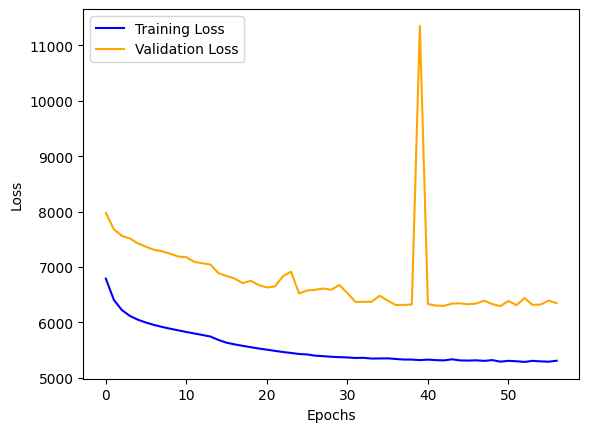

In [66]:
plt.plot(train_losses, label='Training Loss', color='blue')
plt.plot(val_losses, label='Validation Loss', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Test with Real Data

In [35]:
test_df = pd.read_csv('./B01_TransformData_FinalAvatar_20230922_171230.csv').iloc[300:-100]

In [36]:
test_df.head()

,Frame,Time,m_avg_PelvisPosX,m_avg_PelvisPosY,m_avg_PelvisPosZ,m_avg_PelvisRotX,m_avg_PelvisRotY,m_avg_PelvisRotZ,m_avg_L_HipPosX,m_avg_L_HipPosY,...,m_avg_R_ElbowRotX,m_avg_R_ElbowRotY,m_avg_R_ElbowRotZ,m_avg_R_WristPosX,m_avg_R_WristPosY,m_avg_R_WristPosZ,m_avg_R_WristRotX,m_avg_R_WristRotY,m_avg_R_WristRotZ,Unnamed: 128
300,301,3.516298,0.167637,0.309281,1.707612,357.083,356.5699,359.1780,0.110527,0.229474,...,351.9312,358.1726,282.4885,0.484731,0.254242,1.712456,339.4850,296.8258,305.4126,NaN
301,302,3.527282,0.167637,0.309281,1.707612,357.083,356.5699,359.1780,0.110527,0.229474,...,350.7178,357.2758,281.4112,0.473791,0.253382,1.724783,337.8150,292.9910,307.2033,NaN
302,303,3.538654,0.167637,0.309281,1.707612,357.083,356.5699,359.1780,0.110527,0.229474,...,349.4878,356.3683,280.3726,0.462770,0.253029,1.736980,336.0336,289.2522,308.9090,NaN
303,304,3.549650,0.169145,0.316027,1.705714,357.288,355.9712,359.2451,0.112322,0.236200,...,348.2825,355.5042,279.3825,0.452501,0.258765,1.747534,334.1286,285.3405,310.8063,NaN
304,305,3.561161,0.169145,0.316027,1.705714,357.288,355.9712,359.2451,0.112322,0.236200,...,346.9774,354.4922,278.4650,0.441532,0.259532,1.759929,332.4753,281.4930,312.3235,NaN


In [37]:
test_rotation_columns = [col for col in test_df.columns if 'Rot' in col]

test_position_columns = [col for col in test_df.columns if 'Pos' in col]

# DataFrame 분리
test_rotation_df = test_df[test_rotation_columns]
test_position_df = test_df[test_position_columns]

# Rotation 컬럼만 -180~180 사이로 정규화
normalize_angle = lambda x:x if x == 999 else (x - 360) if x > 180 else (x + 360) if x < -180 else x
test_rotation_df = test_rotation_df.apply(lambda col: col.apply(normalize_angle))

In [38]:
# -180 ~ 180 범위를 벗어나는 값이 있는지 확인
num_values_out_of_range = (test_rotation_df > 180).sum().sum() + (test_df < -180).sum().sum()

# 결과 확인
if num_values_out_of_range > 0:
    print(f"범위를 벗어나는 값의 수: {num_values_out_of_range}")
else:
    print("범위를 벗어나는 값이 없습니다.")

범위를 벗어나는 값이 없습니다.


In [39]:
# Position 컬럼은 그대로 두고, 다시 합치기
test_posrot_df = pd.concat([test_position_df, test_rotation_df], axis=1)

In [40]:
test_posrot_df = test_posrot_df.map(lambda x: float(f"{x:.2f}") if isinstance(x, (int, float)) else x)

In [41]:
test_posrot_df

,m_avg_PelvisPosX,m_avg_PelvisPosY,m_avg_PelvisPosZ,m_avg_L_HipPosX,m_avg_L_HipPosY,m_avg_L_HipPosZ,m_avg_L_KneePosX,m_avg_L_KneePosY,m_avg_L_KneePosZ,m_avg_L_AnklePosX,...,m_avg_R_CollarRotZ,m_avg_R_ShoulderRotX,m_avg_R_ShoulderRotY,m_avg_R_ShoulderRotZ,m_avg_R_ElbowRotX,m_avg_R_ElbowRotY,m_avg_R_ElbowRotZ,m_avg_R_WristRotX,m_avg_R_WristRotY,m_avg_R_WristRotZ
300,0.17,0.31,1.71,0.11,0.23,1.69,0.08,-0.15,1.68,0.10,...,-9.95,-13.38,-3.53,-72.61,-8.07,-1.83,-77.51,-20.51,-63.17,-54.59
301,0.17,0.31,1.71,0.11,0.23,1.69,0.08,-0.15,1.68,0.10,...,-9.95,-14.63,-4.33,-73.67,-9.28,-2.72,-78.59,-22.19,-67.01,-52.80
302,0.17,0.31,1.71,0.11,0.23,1.69,0.08,-0.15,1.68,0.10,...,-9.95,-15.89,-5.14,-74.70,-10.51,-3.63,-79.63,-23.97,-70.75,-51.09
303,0.17,0.32,1.71,0.11,0.24,1.69,0.08,-0.14,1.69,0.11,...,-10.36,-17.12,-5.92,-75.68,-11.72,-4.50,-80.62,-25.87,-74.66,-49.19
304,0.17,0.32,1.71,0.11,0.24,1.69,0.08,-0.14,1.69,0.11,...,-10.36,-18.44,-6.85,-76.59,-13.02,-5.51,-81.54,-27.52,-78.51,-47.68
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4671,0.13,0.22,2.13,0.07,0.14,2.11,0.05,-0.23,2.14,0.08,...,-6.57,10.95,21.91,6.28,10.27,27.53,2.73,-4.35,-4.97,20.79
4672,0.13,0.22,2.13,0.07,0.14,2.11,0.05,-0.23,2.14,0.08,...,-6.57,10.97,21.81,6.17,10.30,27.43,2.62,-4.38,-5.10,20.49
4673,0.13,0.22,2.13,0.07,0.14,2.11,0.05,-0.23,2.14,0.08,...,-6.57,10.97,21.70,6.11,10.31,27.33,2.57,-4.40,-5.26,20.18
4674,0.13,0.22,2.13,0.07,0.14,2.11,0.05,-0.23,2.13,0.09,...,-6.76,10.99,21.59,6.03,10.34,27.22,2.49,-4.34,-5.49,19.92


In [42]:
# 결과를 새로운 CSV 파일로 저장합니다.
test_posrot_df.to_csv('./test_posrot_df.csv', index=True)

In [43]:
# 모델 불러오기
model = TransformerModel(
    n_features=n_features,
    num_heads=num_heads,
    ff_dim=ff_dim,
    num_blocks=num_blocks,
    mlp_units=mlp_units,
    dropout=dropout_rate,
    n_input=n_input
)

model.load_state_dict(torch.load('final_model_Transformer.pth'))

# 모델을 평가 모드로 설정
model.eval()

# 예측 값을 넣을 빈 리스트
test_predictions = []

# 훈련 데이터셋에서 마지막 입력 개수의 값을 가져온 후
current_batch = torch.from_numpy(test_posrot_df[-n_input:].values.astype(np.float32)).reshape((1, n_input, n_features))

# 모델이 사용하는 디바이스를 확인하고 데이터를 해당 디바이스로 옮깁니다.
current_device = 'cuda' if torch.cuda.is_available() else 'cpu'
model.to(current_device)
current_batch = current_batch.to(current_device)

# 예측 과정 반복
with torch.no_grad():  # 그래디언트 계산을 비활성화
    for i in range(1):
        # 현재 배치에서 다음 포인트를 예측
        current_pred = model(current_batch).cpu().numpy()[0]  # 마지막 시퀀스 포인트 예측
        current_pred = np.array([normalize_angle(y) for y in current_pred])  # 예측값 정규화

        # 예측된 마지막 프레임을 리스트에 추가
        test_predictions.append(current_pred)

        # 새로운 배치 생성: 마지막 시퀀스 제외하고 예측값 추가
        current_batch = np.roll(current_batch.cpu().numpy(), -1, axis=1)
        current_batch[:, -1, :] = current_pred
        current_batch = torch.from_numpy(current_batch).to(current_device)

In [44]:
test_predictions_array = np.array(test_predictions)

In [45]:
# 변환된 배열을 데이터프레임으로 변환합니다. 이때 column_order 리스트를 열 이름으로 사용합니다.
test_predictions = pd.DataFrame(test_predictions_array, columns=column_order)

# test_predictions 데이터프레임을 CSV 파일로 저장합니다.
test_predictions.to_csv('./test_predictions.csv', index=True)


In [46]:
test_predictions

,m_avg_PelvisPosX,m_avg_PelvisPosY,m_avg_PelvisPosZ,m_avg_L_HipPosX,m_avg_L_HipPosY,m_avg_L_HipPosZ,m_avg_L_KneePosX,m_avg_L_KneePosY,m_avg_L_KneePosZ,m_avg_L_AnklePosX,...,m_avg_R_CollarRotZ,m_avg_R_ShoulderRotX,m_avg_R_ShoulderRotY,m_avg_R_ShoulderRotZ,m_avg_R_ElbowRotX,m_avg_R_ElbowRotY,m_avg_R_ElbowRotZ,m_avg_R_WristRotX,m_avg_R_WristRotY,m_avg_R_WristRotZ
0,-3.92031,-3.534008,-2.632143,-3.997756,-3.614383,-2.648881,-4.036597,-3.976387,-2.598897,-4.010202,...,-12.678426,-5.941551,-4.171821,-15.924047,-5.421728,32.368019,-20.490168,-6.409177,-39.958096,16.002148


In [47]:
# input 데이터(test_df)의 마지막 30 프레임과 
last_inputs_df = test_posrot_df.iloc[-30:][column_order].reset_index(drop=True)
test_predictions_df = pd.DataFrame(test_predictions_array, columns=column_order)

test_combined_df = pd.concat([last_inputs_df, test_predictions_df], ignore_index=True)

In [48]:
test_combined_df

,m_avg_PelvisPosX,m_avg_PelvisPosY,m_avg_PelvisPosZ,m_avg_L_HipPosX,m_avg_L_HipPosY,m_avg_L_HipPosZ,m_avg_L_KneePosX,m_avg_L_KneePosY,m_avg_L_KneePosZ,m_avg_L_AnklePosX,...,m_avg_R_CollarRotZ,m_avg_R_ShoulderRotX,m_avg_R_ShoulderRotY,m_avg_R_ShoulderRotZ,m_avg_R_ElbowRotX,m_avg_R_ElbowRotY,m_avg_R_ElbowRotZ,m_avg_R_WristRotX,m_avg_R_WristRotY,m_avg_R_WristRotZ
0,0.14000,0.240000,2.130000,0.080000,0.160000,2.110000,0.070000,-0.210000,2.140000,0.120000,...,-22.950000,10.220000,25.170000,9.440000,9.240000,30.740000,5.800000,-1.590000,-1.080000,28.350000
1,0.10000,0.200000,2.140000,0.140000,0.120000,2.100000,0.080000,-0.240000,2.190000,-0.150000,...,-9.760000,10.190000,25.240000,9.640000,9.190000,30.800000,5.990000,-1.950000,-1.220000,28.450000
2,0.10000,0.200000,2.140000,0.140000,0.120000,2.100000,0.080000,-0.240000,2.190000,-0.150000,...,-9.760000,10.210000,25.230000,9.700000,9.200000,30.790000,6.050000,-2.250000,-1.390000,28.470000
3,0.10000,0.200000,2.140000,0.140000,0.120000,2.100000,0.080000,-0.240000,2.190000,-0.150000,...,-9.760000,10.220000,25.190000,9.740000,9.210000,30.750000,6.090000,-2.550000,-1.550000,28.440000
4,0.13000,0.210000,2.130000,0.070000,0.130000,2.110000,0.050000,-0.240000,2.120000,0.070000,...,-17.430000,10.250000,25.120000,9.710000,9.240000,30.680000,6.060000,-2.900000,-1.710000,28.450000
5,0.13000,0.210000,2.130000,0.070000,0.130000,2.110000,0.050000,-0.240000,2.120000,0.070000,...,-17.430000,10.270000,25.040000,9.660000,9.270000,30.600000,6.020000,-3.260000,-1.870000,28.500000
6,0.13000,0.210000,2.130000,0.070000,0.130000,2.110000,0.050000,-0.240000,2.120000,0.070000,...,-17.430000,10.300000,24.950000,9.570000,9.310000,30.510000,5.940000,-3.590000,-2.080000,28.500000
7,0.13000,0.220000,2.130000,0.070000,0.140000,2.110000,0.050000,-0.230000,2.130000,0.070000,...,-12.610000,10.350000,24.770000,9.400000,9.370000,30.330000,5.770000,-3.910000,-2.330000,28.320000
8,0.13000,0.220000,2.130000,0.070000,0.140000,2.110000,0.050000,-0.230000,2.130000,0.070000,...,-12.610000,10.400000,24.610000,9.230000,9.440000,30.180000,5.610000,-4.220000,-2.600000,27.990000
9,0.13000,0.220000,2.130000,0.070000,0.140000,2.110000,0.050000,-0.230000,2.130000,0.070000,...,-12.610000,10.440000,24.460000,9.050000,9.500000,30.030000,5.430000,-4.470000,-2.940000,27.070000


In [49]:
test_combined_df.to_csv('./test_combined_df.csv', index=True)

# Visualize

In [50]:
import matplotlib
matplotlib.use('TkAgg')
from mpl_toolkits.mplot3d import Axes3D
%matplotlib tk

In [51]:
joint_names = ['Pelvis', 'L_Hip', 'R_Hip', 'L_Knee', 'R_Knee', 'L_Ankle', 'R_Ankle', 'L_Foot', 'R_Foot', 'Spine1', 'Spine2', 
               'L_Collar', 'R_Collar', 'L_Shoulder', 'R_Shoulder', 'L_Elbow', 'R_Elbow', 'L_Wrist', 'R_Wrist', 'Neck', 'Head']

In [52]:
connections = [
    ('Pelvis', 'L_Hip'), ('Pelvis', 'R_Hip'),
    ('L_Hip', 'L_Knee'), ('R_Hip', 'R_Knee'),
    ('L_Knee', 'L_Ankle'), ('R_Knee', 'R_Ankle'),
    ('L_Ankle', 'L_Foot'), ('R_Ankle', 'R_Foot'),
    ('Spine1', 'Spine2'), ('Spine2', 'Pelvis'),
    ('Spine1', 'Neck'), ('Neck', 'Head'),
    ('Spine1', 'L_Collar'), ('Spine1', 'R_Collar'),
    ('L_Collar', 'L_Shoulder'), ('R_Collar', 'R_Shoulder'),
    ('L_Shoulder', 'L_Elbow'), ('R_Shoulder', 'R_Elbow'),
    ('L_Elbow', 'L_Wrist'), ('R_Elbow', 'R_Wrist')
]

In [53]:
def visualize_skeleton(df, connections):
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')

    # Plot each joint
    for joint in joint_names:
        ax.scatter(df[f'm_avg_{joint}PosX'], df[f'm_avg_{joint}PosY'], df[f'm_avg_{joint}PosZ'], label=joint)

    # Draw lines (bones) connecting the joints
    for connection in connections:
        joint_from, joint_to = connection
        ax.plot(
            [df[f'm_avg_{joint_from}PosX'], df[f'm_avg_{joint_to}PosX']],
            [df[f'm_avg_{joint_from}PosY'], df[f'm_avg_{joint_to}PosY']],
            [df[f'm_avg_{joint_from}PosZ'], df[f'm_avg_{joint_to}PosZ']],
            'k-'
        )

    # Set labels and legend
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.legend(loc='best')

    # Set the initial viewing angle
    ax.view_init(elev=20., azim=-90)

    plt.show()

# Visualize the first frame
visualize_skeleton(test_predictions.iloc[0], connections)